# Assignment 1

## Introduction

## Data cleaning
### Read in and merge the two data sets (tip: think of different CSV formats that exist)

In [50]:
import seaborn as sns #for plotting visualisations 
import pandas as pd
import matplotlib.pyplot as plt #for labelling an such
from matplotlib import figure as fig

from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

import math

from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [51]:
df_survey = pd.read_csv("survey.csv")
df_survey.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [52]:
df_steps = pd.read_csv("steps.csv", sep = ";")
df_steps.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
merged_df = pd.merge(df_survey, df_steps, on = "id") #'id' is the common identifier
merged_df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clean the data: remove impossible values

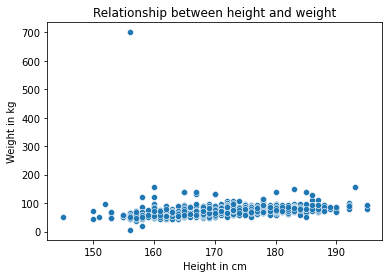

In [54]:
sns.scatterplot(x="height", y="weight", data=merged_df)
plt.title("Relationship between height and weight")
plt.xlabel("Height in cm")
plt.ylabel("Weight in kg")
plt.show()

The data visualisation shows data points with improbable weights (700kg). Therefore these data points have been marked as an outlier due to improper data-entry and will be removed in a new dataframe in the code below.

In [55]:
df = merged_df

df = df.fillna(0)

df = df[(df["weight"] < 200) & (df["weight"] > 35)] # excluding very high and low weights
df = df[(df["height"] > 100)] # most people are over 100cm tall
df = df[(df["id"] != None)] # clear any blank lines without any id

print(len(df.columns)) # check how many columns there are

337


### Create the variable mean steps per participant. Hint: combine Pandas .loc and .mean() with the right axis argument (axis=....) for mean(). Look up the documentation of .loc and Pandas .mean() if you're unsure.

In [56]:
df["mean_steps"] = df.loc[0:,"20-6-2013":"13-5-2014"].mean(axis=1)

### Show the head() of the resulting data frame

In [57]:
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5133.875000
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2826.371951
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0,3745.902439
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,221.536585
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,874.557927


## Feature engineering
- The prediction of the model can be improved by computing a variable that gives a better indication of a healthy weight than weight alone. Can you think of one? If not, just skip this step.

In [58]:
df["bmi"] = 1.3*(df["weight"]/((df["height"]/100)**2.5))

df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps,bmi
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5133.875000,30.138347
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2826.371951,23.027819
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0,3745.902439,24.822195
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,221.536585,24.602732
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,874.557927,22.003006


The reason  I chose this BMI calculation formula (https://people.maths.ox.ac.uk/trefethen/bmi.html), by Nick Trefethen. He has a number of arguments against the use of the simple BMI formula. We live in a 3 dimensional world and yet we use a very linear scale for general health as defined by our height and weight.

<AxesSubplot:ylabel='mean_steps'>

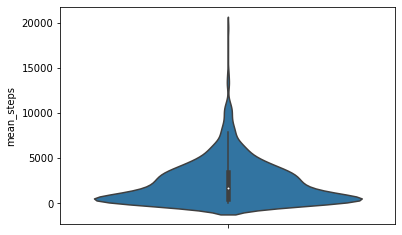

In [59]:
sns.violinplot(y="mean_steps", data=df)

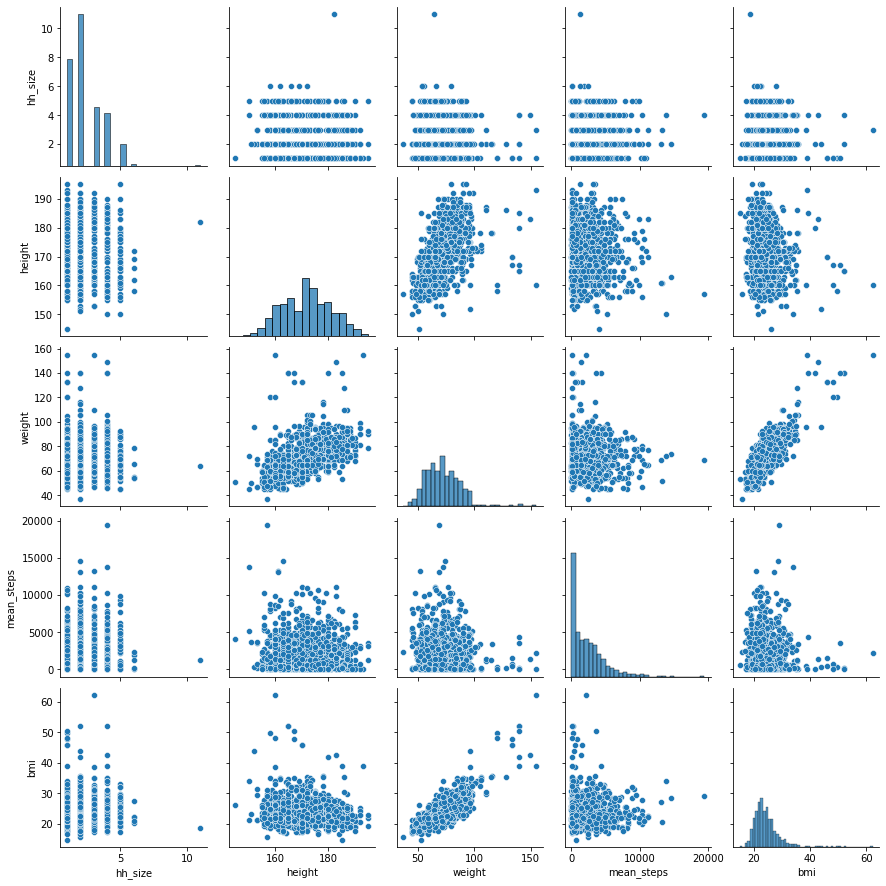

In [60]:
df_subset = df[["city", "gender","age", "education_1", "hh_size", "height", "weight", "mean_steps", "bmi"]]
df_num_subset = df[["hh_size", "height", "weight", "mean_steps", "bmi"]]

sns.pairplot(df_num_subset)

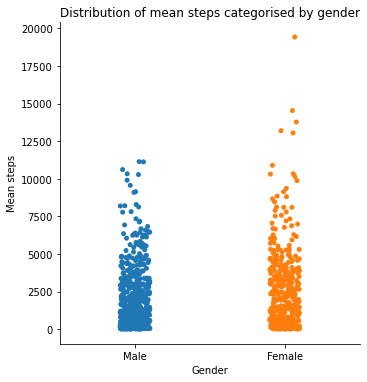

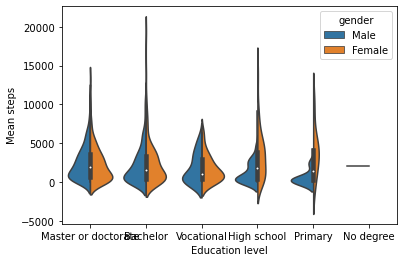

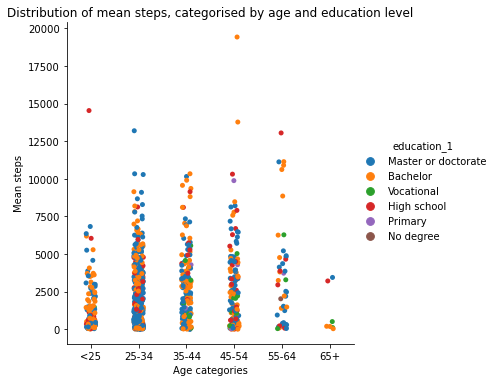

In [61]:
sns.catplot(x="gender", y="mean_steps", data=df_subset)
plt.title("Distribution of mean steps categorised by gender")
plt.xlabel("Gender")
plt.ylabel("Mean steps")
plt.show()

sns.violinplot(x="education_1", y="mean_steps", hue="gender", data=df_subset, legend_out=True, split=True)
plt.xlabel("Education level")
plt.ylabel("Mean steps")
plt.show()

sns.catplot(x="age", y="mean_steps", hue="education_1", order=["<25","25-34","35-44","45-54", "55-64", "65+"], data=df_subset)
plt.xlabel("Age categories")
plt.ylabel("Mean steps")
plt.title("Distribution of mean steps, categorised by age and education level")
plt.show()

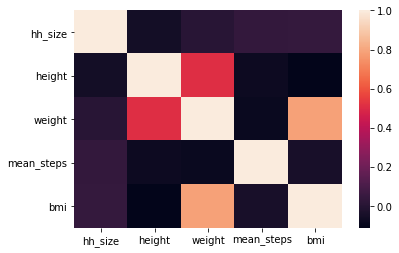

In [62]:
sns.heatmap(df_num_subset.corr())
plt.show()

## Exploratory data analysis
- An analysis of mean steps per participant:
- Graph of the distribution (e.g., histogram, box plot, density plot, violin plot)
- Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)
- Verbal description of the distribution, including commenting on normality, skewness, outliers, etc.
- The relation of mean steps per participant with two categorical variables (e.g. gender, age, education)
- Graph of the relation (e.g. histograms, box plots, density plots, violin plots). Try a different plot this time.
- Describe and interpret the results

- See last week for the first part (distribution of steps). In addition:
- Make a scatterplot matrix of the numerical variables
- Make a correlation matrix of the numerical variables
- Describe and interpret the results

In [63]:
x = df_subset[['bmi']] 
y = df_subset['mean_steps']

lm = LinearRegression()
lm.fit(x, y)

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0]

print(f"The regression line is equal to y = {b0:.3f} + {b1:.3f}X") #.0f formats to 3 decimals. 

print(b0 + (b1*70))

The regression line is equal to y = 2879.411 + -21.855X
1349.5887774320474


<ipython-input-64-a29b9af88bcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['mean_steps_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
<ipython-input-64-a29b9af88bcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['residual'] = df_subset["mean_steps"] - df_subset["mean_steps_p"]


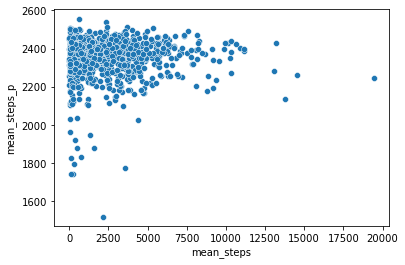

<AxesSubplot:xlabel='mean_steps', ylabel='residual'>

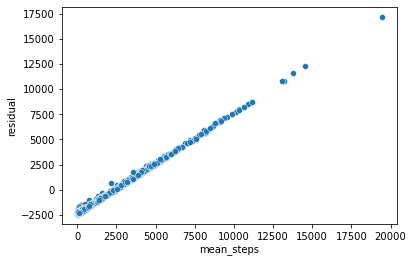

In [64]:
df_subset['mean_steps_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df_subset['residual'] = df_subset["mean_steps"] - df_subset["mean_steps_p"]

sns.scatterplot(data=df_subset, x = "mean_steps", y = "mean_steps_p")
plt.show()

sns.scatterplot(data=df_subset, x="mean_steps", y="residual")

## Predictive model
- Explain linear regression in your own words
- Create dummy variables for the categorical variables
- Fit a linear regression model to predict the mean steps per participant, using the training data. You can include all variables (easy), or you can try to find the combination that gives you the best fit (harder).

Explain linear regression

In [65]:
df_edu = pd.get_dummies(data=df["education_1"])

df_edu.head()

,Bachelor,High school,Master or doctorate,No degree,Primary,Vocational
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [66]:
df = pd.concat([df_subset, df_edu], axis=1)

df

,city,gender,age,education_1,hh_size,height,weight,mean_steps,bmi,mean_steps_p,residual,Bachelor,High school,Master or doctorate,No degree,Primary,Vocational
0,Bordeaux,Male,25-34,Master or doctorate,4,178.0,98.0,5133.875000,30.138347,2220.749493,2913.125507,0,0,1,0,0,0
1,Lille,Male,35-44,Bachelor,1,180.0,77.0,2826.371951,23.027819,2376.147260,450.224691,1,0,0,0,0,0
2,Montpellier,Male,25-34,Master or doctorate,2,180.0,83.0,3745.902439,24.822195,2336.931890,1408.970549,0,0,1,0,0,0
3,Lyon,Male,<25,Bachelor,1,178.0,80.0,221.536585,24.602732,2341.728169,-2120.191584,1,0,0,0,0,0
4,Montpellier,Female,25-34,Bachelor,3,167.0,61.0,874.557927,22.003006,2398.544161,-1523.986234,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,Lille,Female,45-54,Master or doctorate,3,165.0,59.0,1742.908537,21.932367,2400.087941,-657.179405,0,0,1,0,0,0
925,Lille,Male,<25,Bachelor,3,192.0,90.0,731.689024,22.905132,2378.828555,-1647.139531,1,0,0,0,0,0
926,Montpellier,Male,35-44,Bachelor,2,181.0,71.0,6268.954268,20.941378,2421.745606,3847.208663,1,0,0,0,0,0
927,Lille,Female,55-64,High school,1,172.0,65.0,3872.115854,21.778882,2403.442284,1468.673570,0,1,0,0,0,0


In [67]:
X = df[["bmi", "height", "weight"]]
y = df["mean_steps"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.head()

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [68]:
y_test_predict = lm.predict(X_test)

## Evaluation
- Evaluate the model on the test data
- Predictive power of the model (R2, RMSE)
- Investigate the residuals
- Describe and interpret the results

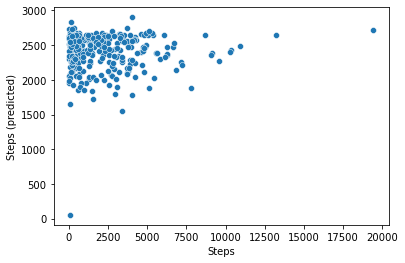

In [69]:
sns.scatterplot(x=y_test,y=y_test_predict)
plt.xlabel('Steps')
plt.ylabel('Steps (predicted)')
plt.show()

In [70]:
r2_score(y_test, y_test_predict)

-0.003923030171782971

In [71]:
math.sqrt(mean_squared_error(y_test, y_test_predict))

2513.1131073245697

## Conclusion

Based on the R2 score and RSME, one could say that the model has poor predictive capabilities, and therefore cannot be used in a meaningful way.